In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import make_blobs

создаем тренировочные данные

In [2]:
data = make_blobs(n_samples=2000, n_features=1000, centers=130, cluster_std=3.0)
pd.DataFrame(data[0]).head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,9.666627,7.407720,-6.094312,3.105606,9.654282,-2.635242,6.957232,3.222847,6.285764,-3.908648,...,-9.347197,4.629740,-12.496731,3.794799,11.114314,2.663150,-7.477762,-6.826068,-2.937700,10.205964
1,12.407955,-8.192225,9.673177,6.444959,4.153939,-4.835117,-5.357883,9.223353,-1.088545,-4.853222,...,-9.264182,17.040606,12.333256,8.136186,2.956837,-5.761251,-4.854129,5.043520,-1.763689,-5.631105
2,12.200985,-5.826655,2.161523,-0.015295,8.190008,7.930365,2.958931,9.584667,3.541535,8.111569,...,7.257022,-11.862630,8.975113,18.165785,-10.811119,7.501593,-11.861811,11.030250,2.026099,1.754328
3,-6.989623,6.220155,-8.123265,-2.495933,-1.458508,-7.564407,0.083420,4.009414,7.045005,-5.577799,...,-13.001397,-5.130225,9.656979,-8.799963,0.744546,12.311312,7.727209,3.928684,-12.238891,5.078594
4,-6.726315,-8.482831,-1.789922,1.185308,5.697769,1.871982,0.275610,7.386537,5.933552,-3.780201,...,2.296847,-8.282709,-3.978275,-4.375846,-7.710150,-4.398297,7.409570,4.000348,-6.159353,-3.523864


выделение целевой переменной

In [3]:
Y = data[1]
X = data[0]

# Уменьшение размерности данных

В примерах ниже будут использованы: 
* Линейные методы уменьшения размерности (PCA) - (быстрые, но не точные)
* Нелинейные методы уменьшения размерности (TSNE) - (точные, но не быстрые)

### Уменьшаем размерность до 2-х мерного пространства 

In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [5]:
# функция для уменьшения размерности
def decrease(X=X, n_comp=2):
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(X)
    
    tsne = TSNE(n_components=n_comp)
    X_tsne = tsne.fit_transform(X)
    
    return X_pca, X_tsne

In [6]:
%%time
X_pca, X_tsne = decrease()

Wall time: 18.8 s


**TSNE требует больше времени на уменьшение размерности данных, но делает это более точно**

Каждый класс помечен своим цветом (за это отвечает параметр "**c**=Y")

In [7]:
# функция для визуализации 2-х датасетов в 2-х мерном пространстве
def scatter_2d(X_pca, X_tsne, text=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))
    fig.suptitle(text, fontsize=16)


    sns.scatterplot(data=X_pca, x=X_pca[:,0], y=X_pca[:,1], s=120, c=Y, ax=ax1, )
    ax1.set_title('PCA', fontsize=16);


    sns.scatterplot(data=X_tsne, x=X_tsne[:,0], y=X_tsne[:,1], s=120, c=Y, ax=ax2)
    ax2.set_title('T-SNE', fontsize=16);

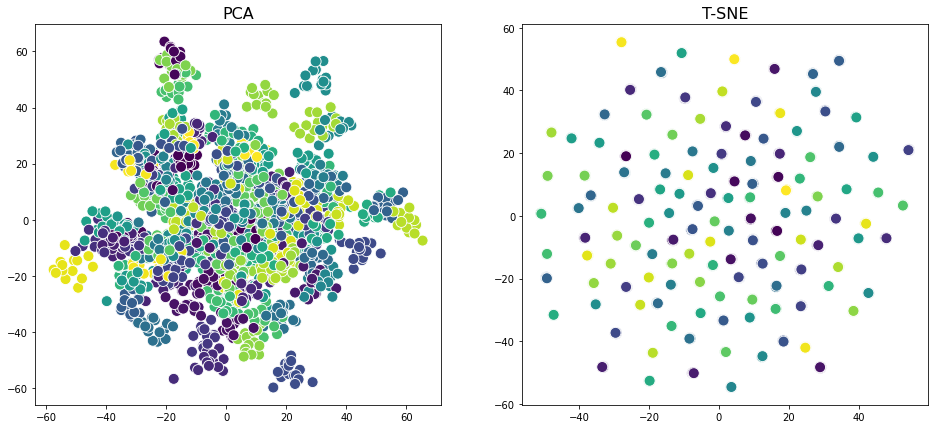

In [8]:
scatter_2d(X_pca, X_tsne)

### Уменьшаем размерность до 3-х мерного пространства

In [9]:
X_pca, X_tsne = decrease(n_comp=3)

In [10]:
# функция для визуализации 2-х датасетов в 3-х мерном пространстве
def scatter_3d(X_pca, X_tsne, text=None):
    fig = plt.figure(figsize=(20,15))
    fig.suptitle(text, fontsize=16)

    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.set_title('PCA', fontsize=16)
    ax1.scatter(xs=X_pca[:,0], ys=X_pca[:,1], zs=X_pca[:,2], s=80, c=Y)
    ax1.set_xlabel('X-axis')
    ax1.set_ylabel('Y-axis')
    ax1.set_zlabel('Z-axis')


    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.set_title('T-SNE', fontsize=16)
    ax2.scatter(xs=X_tsne[:,0], ys=X_tsne[:,1], zs=X_tsne[:,2], s=80, c=Y)
    ax2.set_xlabel('X-axis')
    ax2.set_ylabel('Y-axis')
    ax2.set_zlabel('Z-axis')

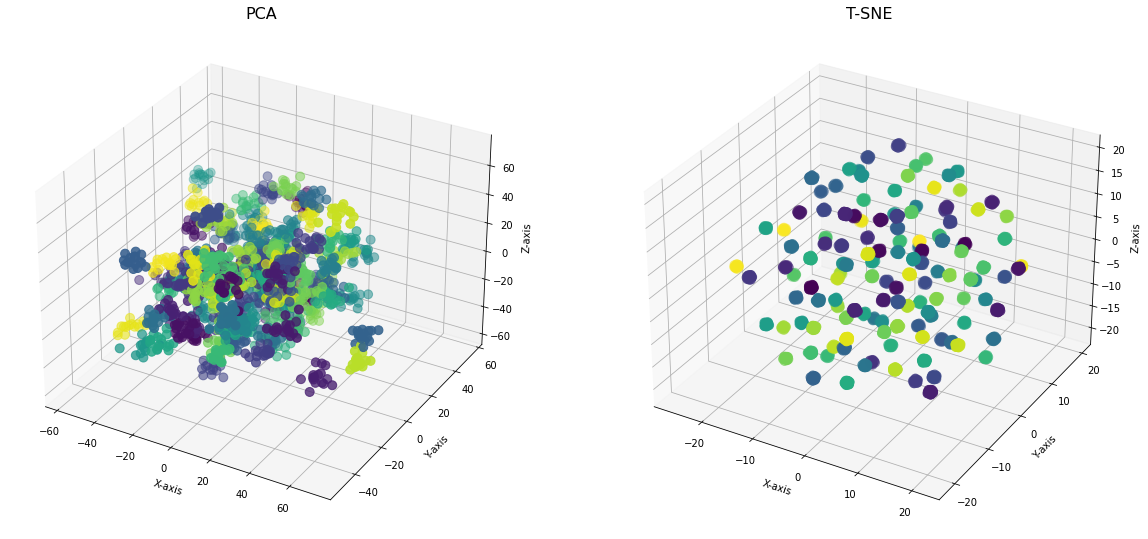

In [11]:
scatter_3d(X_pca, X_tsne)

# Детальный разбор отличий методов

In [12]:
from tqdm import tqdm

100%|████████████████████████████████████████████████████████████████████████████████| 3/3 [1:04:08<00:00, 1282.85s/it]


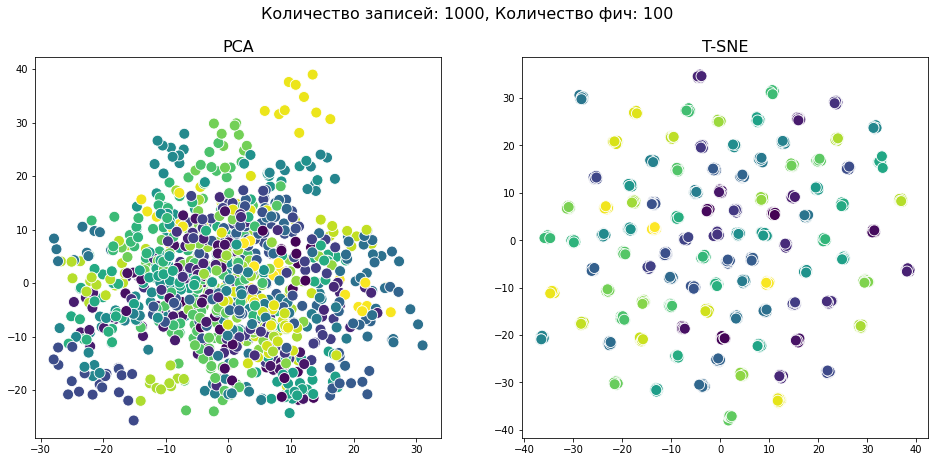

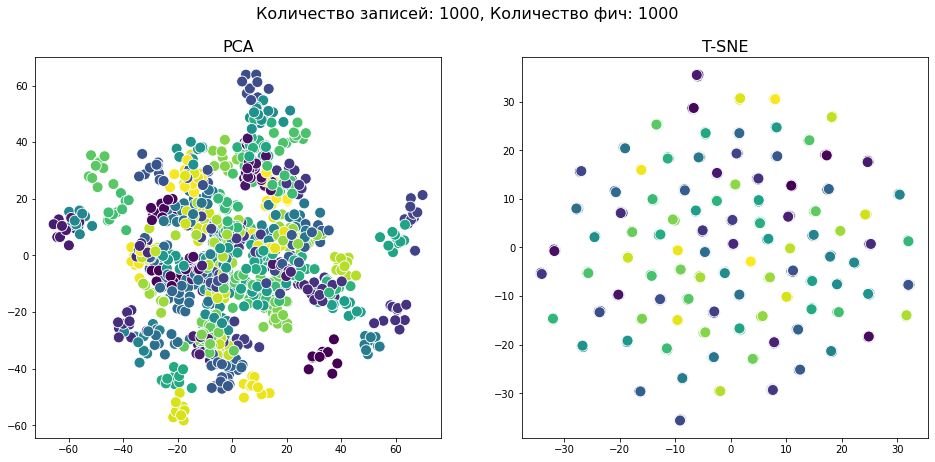

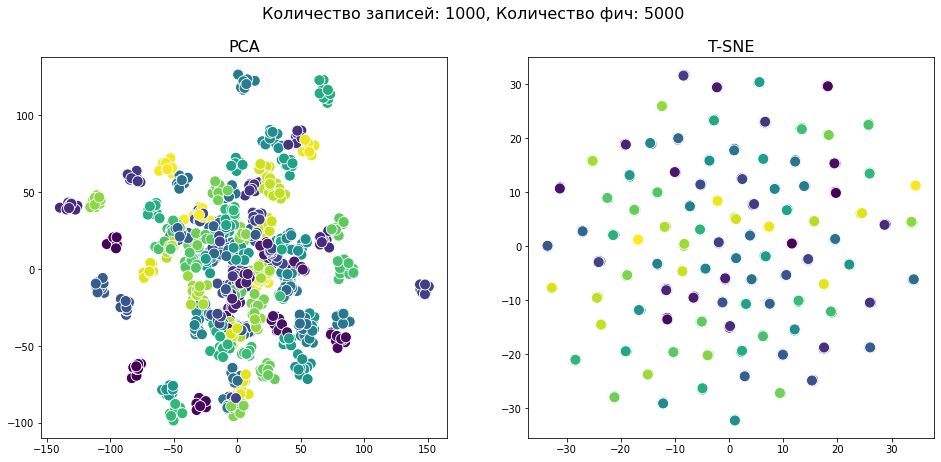

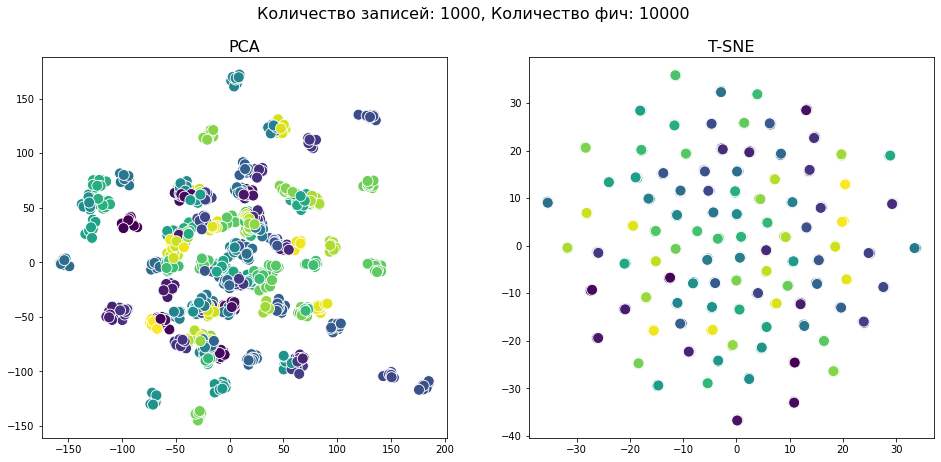

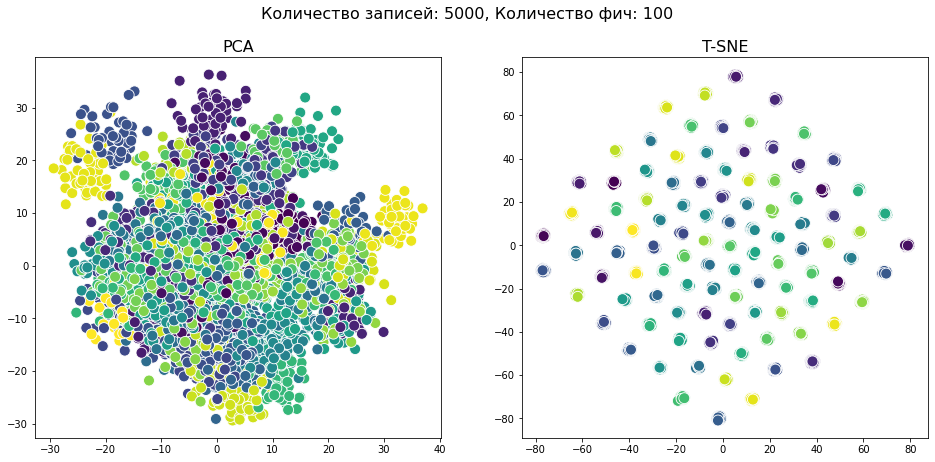

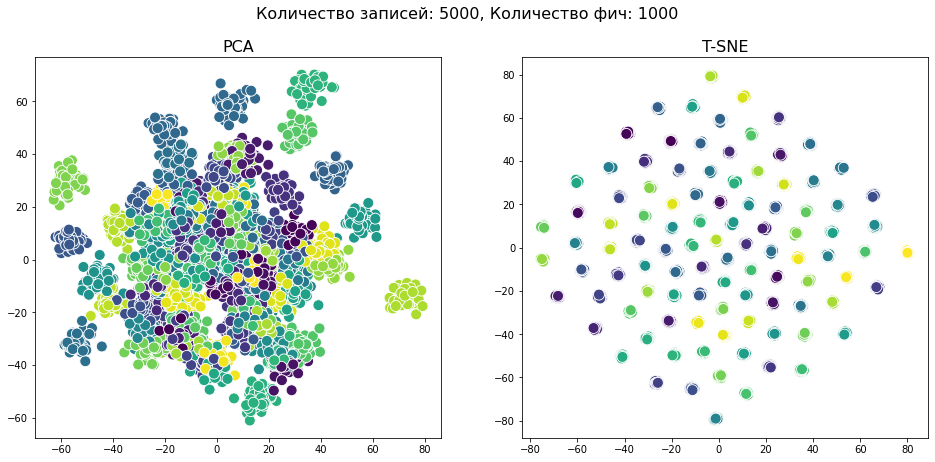

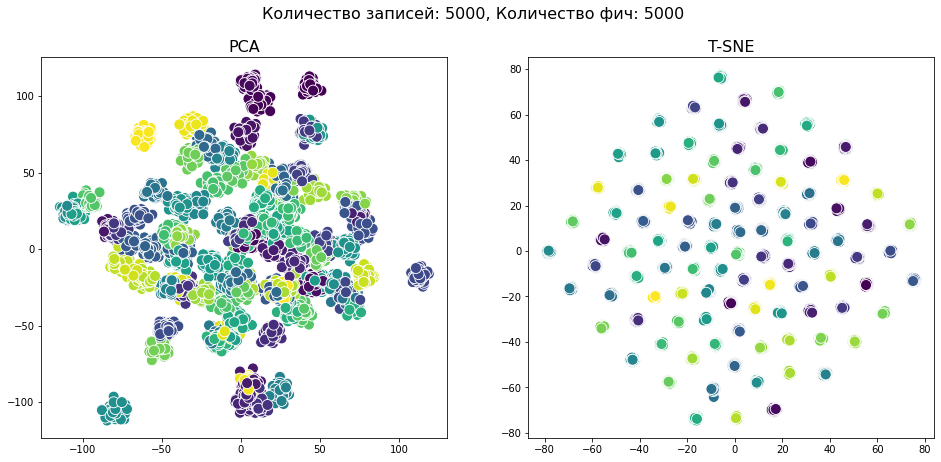

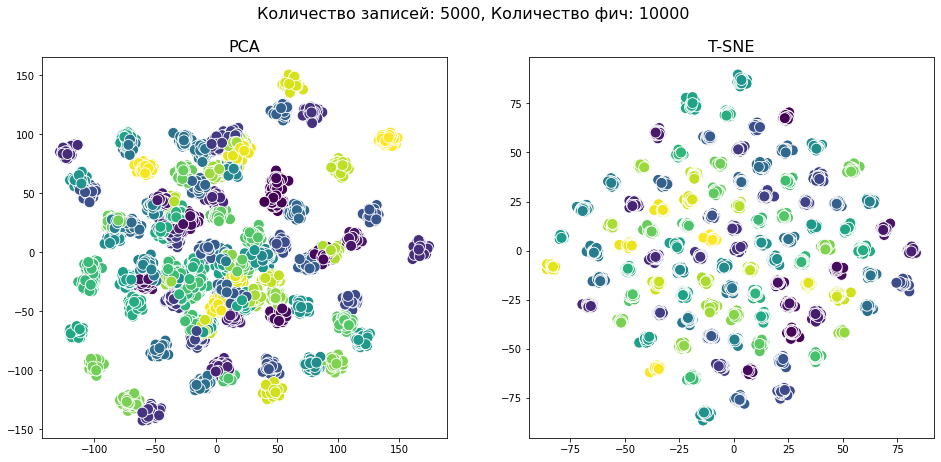

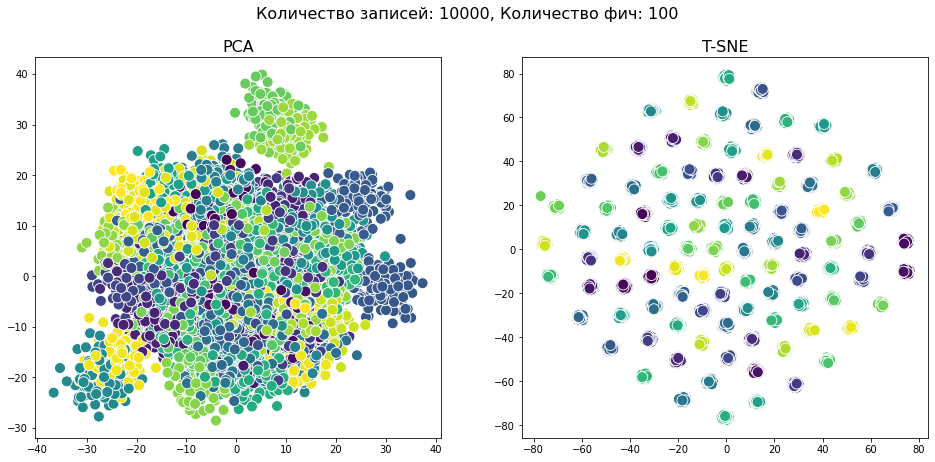

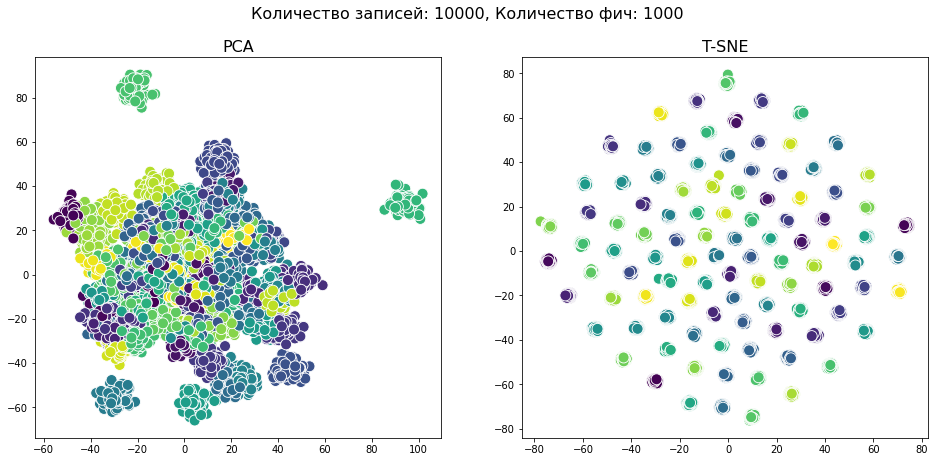

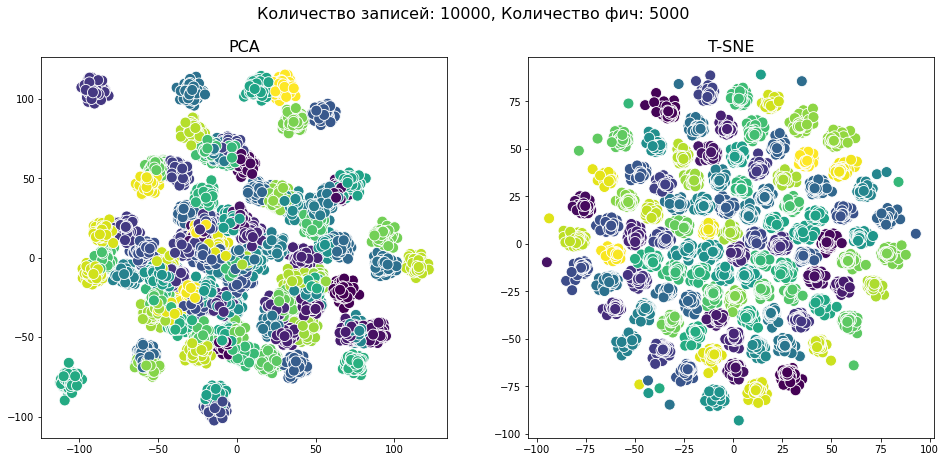

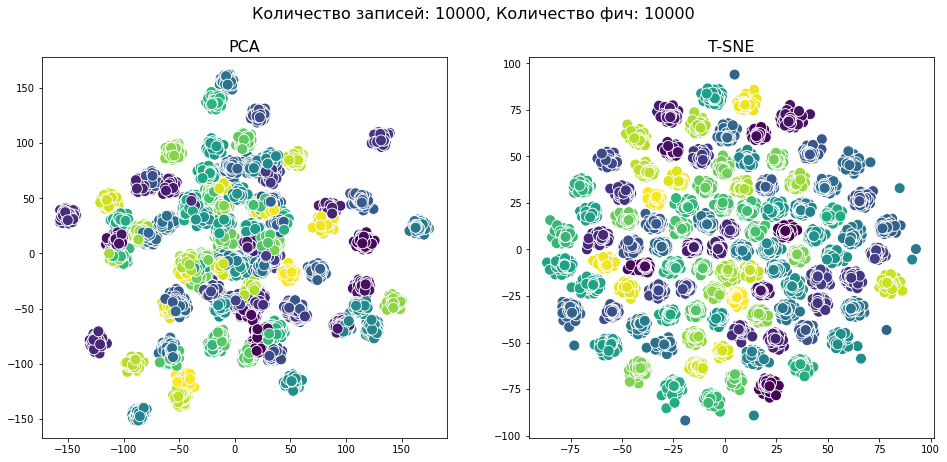

In [13]:
for n_sampl in tqdm([1000, 5000, 10000]):
    for n_feat in [100, 1000, 5000, 10000]:
        X, Y = make_blobs(n_samples=n_sampl, n_features=n_feat, centers=100, cluster_std=3.0)
        X_pca, X_tsne = decrease(X=X, n_comp=2)
        scatter_2d(X_pca, X_tsne, f'Количество записей: {n_sampl}, Количество фич: {n_feat}')